In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [11]:
gw_data = pd.read_csv('GW150914_strain_data_final.txt', sep='\t',header = None, names=['time', 'strain'])
gw_data.shape[0]

2049

<function matplotlib.pyplot.show(close=None, block=None)>

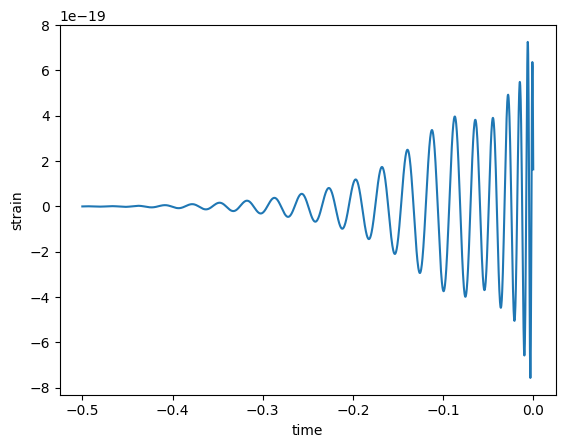

In [12]:
plt.plot(gw_data['time'], gw_data['strain'])
plt.xlabel('time')
plt.ylabel('strain')
plt.show

# Plot Analysis:



## **Pre-merger phase**
***
As the two bodies orbit each other they generate a time-varying quadrupole moment which radiates away energy from the system in the form of Gravitational waves. And as they 
do they lose energy and follow an inward spiral.
### **Left-most part**
This represents the early in-spiral phase of the bodies associated with low amplitudes and frequencies.
### **Increasing frequency and amplitude**
As the two bodies get closer together the orbital velocity increases due to the conservation of angular momentum and with it the rapid change in quadrupole moment which is associated with the increase in amplitudes and frequency of gravitational waves.
## **Merger Phase (Peak)**
***
The point where the amplitude reaches it's maximum value is where the merger occurs. The tallest peak indicates the moment when the two blackhole coalesce into one.
## **Ringdown**

After the peak, the amplitude of the waves quickly diminishes, showing the ringdown phase. This phase represents the newly formed black hole settling into a stable state. The waveform during ringdown is characterized by damped oscillations, which decay rapidly in amplitude. This can be seen as the waves right after the tallest peak, where the amplitude decreases and the frequency of the waves also decreases.

# **Computing the frequency of each cycle**
1. detect the peaks
2. map sets of three peaks to each orbit (Quadrupole moment will have two full cycles in an orbit)
3. get the period of the selected mapping.
4. find the frequences using periods

In [13]:
# Extract time and strain data
time = gw_data['time'].values
strain = gw_data['strain'].values

# Identify peaks in the GW signal
peaks, _ = scipy.signal.find_peaks(strain)

# Filter the peaks with strain values above the threshold
threshold = 3.0e-20
filtered_peaks = [i for i in peaks if strain[i] >= threshold]


# Group peaks to represent each star's orbit (each orbit has two GW cycles as the frequency of wave is double the orbital frequency)
# Assuming the first peak is the start of a new orbit
orbital_entries = filtered_peaks[::2]  # Take every second peak to represent the start of an orbit


# Initialize an array to hold the frequencies
frequencies = []
start_times = []

# Calculate the period and frequency of each orbit
for i in range(len(orbital_entries) - 1):
    # Time of the first peak in the current orbit
    start_time = time[orbital_entries[i]]
    
    # Time of the first peak in the next orbit
    end_time = time[orbital_entries[i + 1]]
    
    # Calculate the period of the orbit
    period = end_time - start_time
    print(period)
    
    # Calculate the frequency (frequency is the reciprocal of the period)
    frequency = 1 / period
    
    frequencies.append(frequency)
    start_times.append(start_time)

# Convert the list of frequencies to a numpy array or a pandas series for further analysis if necessary
frequencies = np.array(frequencies)
start_times = np.array(start_times)


0.060546875
0.058837890625
0.055419921875
0.048095703125
0.036376953125
0.021728515625


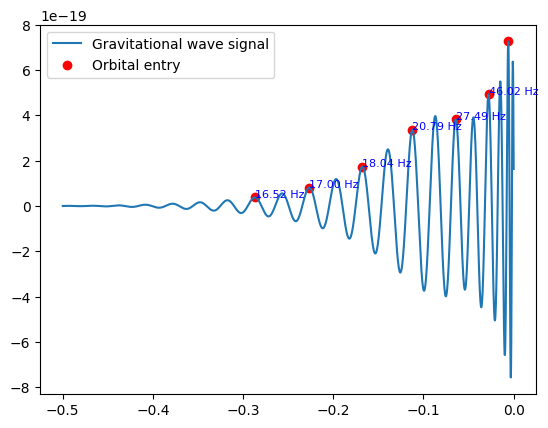

In [14]:
plt.plot(time, strain, label='Gravitational wave signal')
plt.scatter(time[orbital_entries], strain[orbital_entries], label="Orbital entry", c='red')

for i, freq in enumerate(frequencies): plt.text(time[orbital_entries[i]], strain[orbital_entries[i]], f'{freq:.2f} Hz', fontsize=8, color='blue')

plt.legend() 
plt.show()

In [15]:
# Format and print out the frequencies data as requested
formatted_frequency_data = [f"orbit {i+1} - {freq:.2f} Hz" for i, freq in enumerate(frequencies)]

# Display the formatted frequency data for the first few orbits
formatted_frequency_data[:10]

['orbit 1 - 16.52 Hz',
 'orbit 2 - 17.00 Hz',
 'orbit 3 - 18.04 Hz',
 'orbit 4 - 20.79 Hz',
 'orbit 5 - 27.49 Hz',
 'orbit 6 - 46.02 Hz']


## **PART-II Question 1**
***
## **Analysis of Frequencies present in the given Gravitational Wave**
***
## **STFT**
The Short-Time Fourier Transform (STFT) is a technique used to analyze the frequency content of a signal as it changes over time. In the context of gravitational wave data analysis, STFT can be a valuable tool for identifying and characterizing gravitational wave signals.
## **Windowing and Fourier Transform**
The iterative process of sliding the window along the timeline facilitates the creation of a time-frequency representation, offering insights into the evolving spectral content of the gravitational wave signal.
## **Analysis**
Finally we have found out the variation of frequency with respect to time. Using this we can estimate the chirp mass according the formula given in Question 5 of the First Part of the problem Statement 
***
***

In [16]:
import sys
import scipy.signal

In [18]:
sys.path.append( '/home/strider/projects/AstroPS/sms-tools-master/') #importing the files fomr local files
import utilFunctions as UF
import dftModel as DFT
import stft as STFT
import sineModel as Model



-------------------------------------------------------------------------------
Cython modules for some of the core functions were not imported.
Please refer to the README.md file in the 'sms-tools' directory,
for the instructions to compile the cython modules.
Exiting the code!!
-------------------------------------------------------------------------------




AttributeError: 'tuple' object has no attribute 'tb_frame'

In [ ]:
x = np.array(gw_data['strain'])*(10**19)
w = scipy.signal.get_window('hamming',128)

mX,pX = STFT.stftAnal(x,w,2048,4) #mX:- magnitude of frequencies present in the signal(in dB) ,pX:- phase of the frequencies perest in the given gravitational wave

#Reconstruction of Original signal based on the observed frequencies
x_reconstructed = STFT.stftSynth(mX,pX,2048,4) 

#Plotting initial and reconstructed wave
plt.plot(x_reconstructed/(10**19))
plt.plot(gw_data['strain'])

In [ ]:
#Spectrogram of the frequencies present during the merger time
plt.pcolormesh(np.transpose(mX))

In [ ]:
peaks_found = []
times_found = []

#Finding he fundamental frequency present in the give magnitude spectrum at all the time frames considered
for i in range(0,mX.shape[0]):
    peaks,_ = scipy.signal.find_peaks(mX[i,:])
    if(len(peaks)>0):
        max = peaks[0]
        maxVal = mX[i,peaks[0]]
        for k in range(0,peaks.shape[0]):
            if(mX[i,peaks[k]]>maxVal):
                maxVal = mX[i,peaks[k]]
                max = peaks[k]
        if((max!=0) and (maxVal>-50)):
            peaks_found.append((max*4098/2048)**(-8/3))
            times_found.append(i/513*0.5)

#We sample few of those points to look at the data near the merger time
times_found_new = times_found[450:513:4]
peaks_found_new = peaks_found[450:513:4]

plt.scatter(times_found_new,peaks_found_new)

In [ ]:
#Using Curve Fit (Straight line) to find the slope of f^(-8/3) vs. time graph
slope,_ = np.polyfit(times_found_new, peaks_found_new, 1)
slope

In [ ]:
#Calculation og the constant value in the formula of chirp mass
K = 1/(((3/8)*(96/5)*(np.pi)**(8/3)*((6.67*(10**(-11))/(3*(10**8))**3))**(5/3)))
K

In [ ]:
#Estimating the Chirp Mass of the System using curve fit along a Straight Line
M = (-slope*K)**(3/5)
print(M)

## **What Sort of Astrophysical Object could this represent**
***
By seeing the Chirp Mass of the Merger waveform, we can conclude that the Astrophysical Object under observastion is a Merger of Two Black Holes
***

## **PART-II Problem-2**
***
Getting a Mathematical Model from pyCBC using an approximate time domain function
***

In [ ]:
import matplotlib.pyplot as pp
import numpy as np
from pycbc.waveform import get_td_waveform
from pycbc.types import TimeSeries

# Load data from file
time, strain = np.loadtxt('/content/GW150914_strain_data_final.txt', unpack=True)
hp_data = TimeSeries(strain, delta_t=time[1] - time[0], epoch=time[0])

# Generate waveform with IMRPhenomD

hp_model, _ = get_td_waveform(approximant='SEOBNRv4', mass1=35, mass2=35, spin1z=0.9, delta_t=1.0/4096, f_lower=20)

# Plot both data and model
# pp.plot(hp_data.sample_times, hp_data, label='Data from file')
plot = hp_model.sample_times
pp.plot(plot, hp_model, label='SEOBNR')

  
pp.show()

## **Plot near the Merger Time of the Two Black Holes**

In [ ]:
import numpy as np
from pycbc.types import TimeSeries
from pycbc import fft, waveform
import matplotlib.pyplot as plt

# Assume you have the strain data in hp
# Replace this with your actual strain data
hp = hp_model

# Perform Fourier transform to get frequency
# frequency_domain = hp.to_frequencyseries()
# freq = frequency_domain.sample_frequencies

# Identify the time at which the dominant frequency increases rapidly
merger_freq_index = np.argmax(np.abs(hp))
merger_time = hp.sample_times[merger_freq_index]

# Plot the waveform and mark the identified merger time
plt.plot(hp.sample_times, hp, label='Data from file')
plt.axvline(merger_time, color='red', linestyle='--', label='Merger Time')
zoom_start = merger_time - 1
zoom_end = merger_time + 1
plt.xlim(zoom_start, zoom_end)
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

print(f'Merger Time: {merger_time} seconds')


## **Chirp Mass Estimation Using Curve Fitting**

In [ ]:
import matplotlib.pyplot as pp
import numpy as np
from pycbc.waveform import get_td_waveform
from pycbc.types import TimeSeries

# Load data from file
time, strain = np.loadtxt('/content/GW150914_strain_data_final.txt', unpack=True)
hp_data = TimeSeries(strain, delta_t=time[1] - time[0], epoch=time[0])

# Generate waveform with IMRPhenomD
for mass2U in range(30,70):
  hp_model, _ = get_td_waveform(approximant='SEOBNRv4', mass1=25, mass2=mass2U, spin1z=0.9, delta_t=1.0/4096, f_lower=20)

  # Plot both data and model
  # pp.plot(hp_data.sample_times, hp_data, label='Data from file')
  plt.plot(time, signal, label='Original Signal')
  plot = hp_model.sample_times
  pp.plot(plot, hp_model, label='SEOBNR')

    
  pp.show()

## **Result**
by fixing one of the values and making multiple Iterations we notice that our curve almost fits with one of the masses being 25 Solar Masses and other is approximately 48 Solar Masses , and we obtain that our Chirp Mass must be about 29.8 Solar masses

# Expression for Intensity

We know that gravitational intensity is inversely proportional to the square of distance from the source
$$
    I \propto \frac{1}{R^{2}}
$$
It is also proportional to the power which is itself dependent on the square of the third derivative of the quadrupole moment(Using extension of Larmor's formula), G and c
$$
    I \propto P,
$$
$$
    P \propto \left(\frac{\partial^{3}Q}{\partial t^{3}}\right)^{2}
$$

By dimensional Analysis
$$
    P = \frac{32 G}{5 c^{5}} \left(\frac{\partial^{3}Q}{\partial t^{3}}\right)^{2}
$$
$$
    I \propto \frac{1}{R^{2}} \frac{32 G}{5 c^{5}} \left(\frac{\partial^{3}Q}{\partial t^{3}}\right)^{2}
$$
Give the proportionality constant is $\frac{\pi}{2}$:
$$
    I = \frac{1}{R^{2}} \frac{16 \pi G}{5 c^{5}} \left(\frac{\partial^{3}Q}{\partial t^{3}}\right)^{2}
$$